[ WARN:0@621.582] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('colormap.png'): can't open/read file: check file path/integrity


AxisError: axis 2 is out of bounds for array of dimension 0

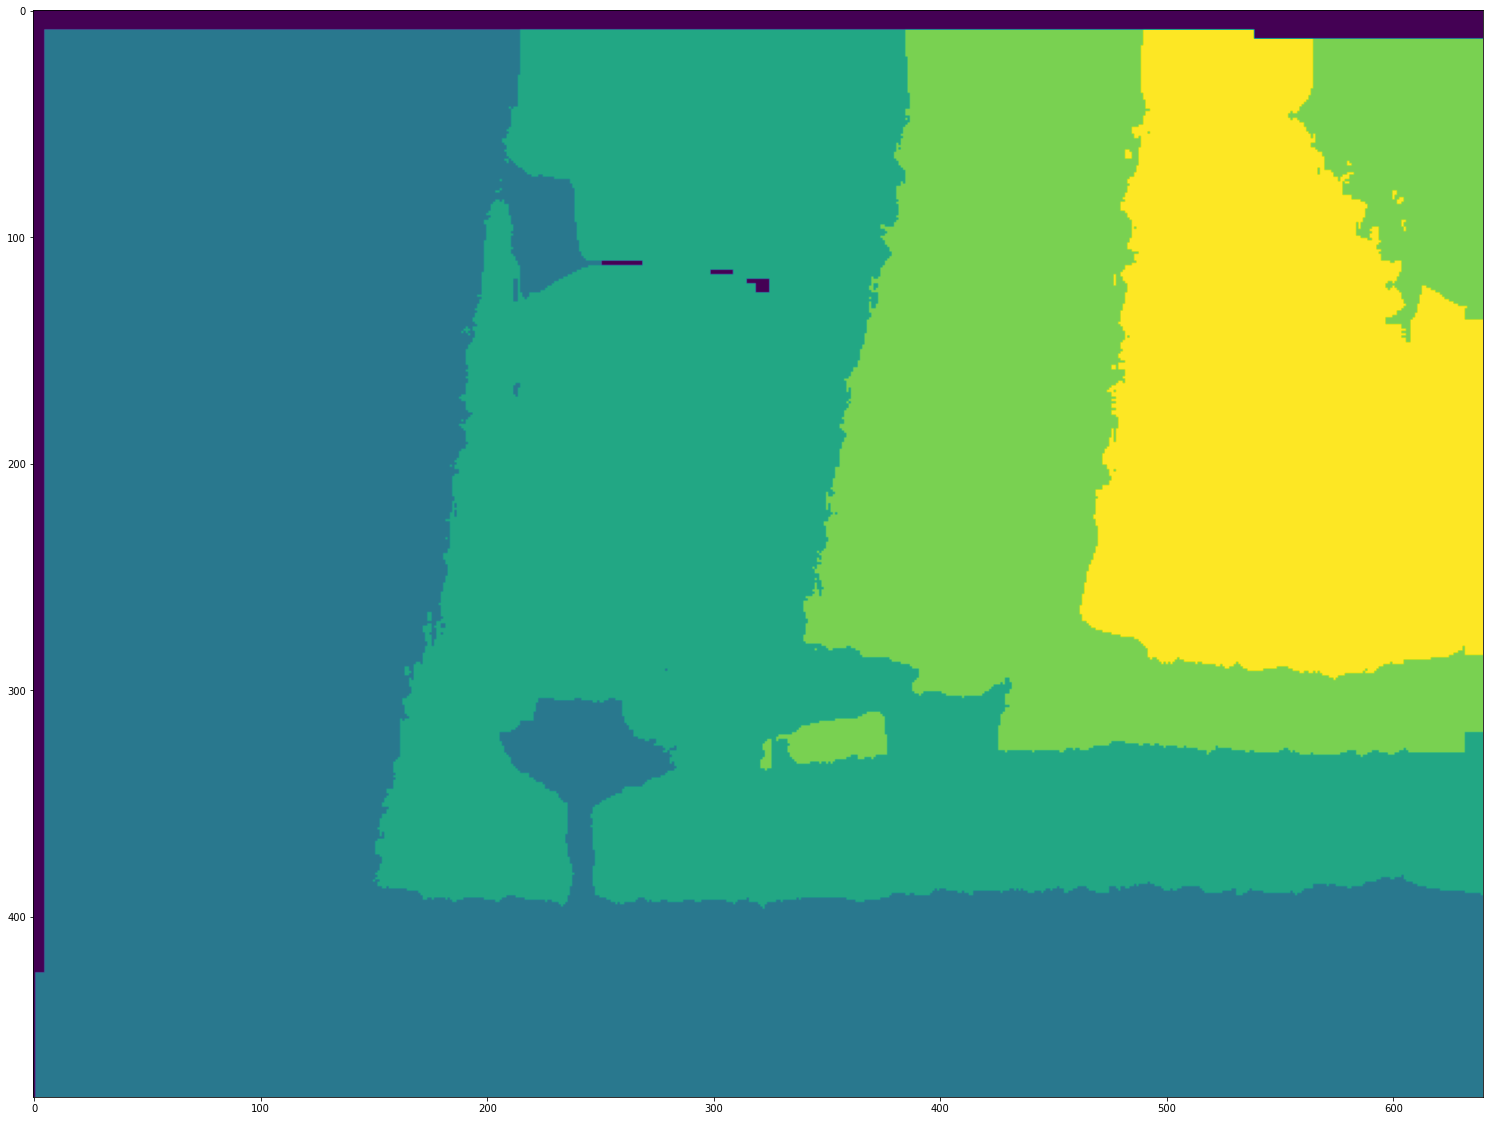

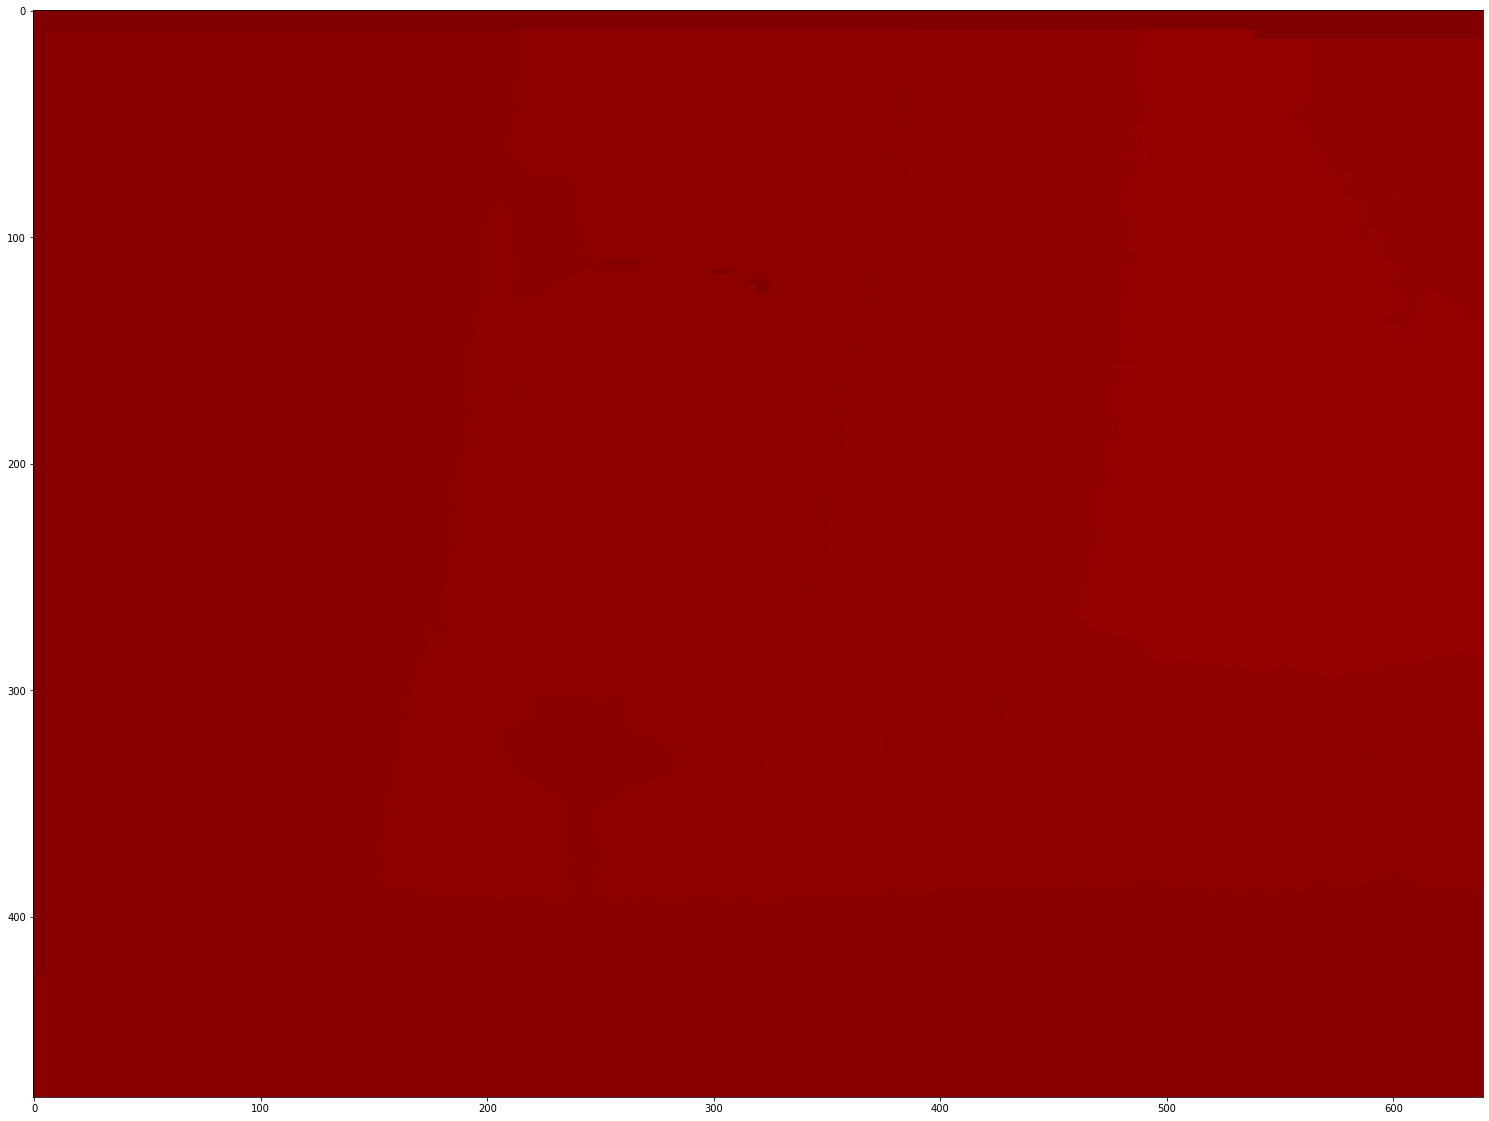

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# import torch
dir = '/SSD_DISK/users/chenjiaqi/data/nyudepthv2/train/student_lounge_0001/01871.h5'

import h5py
with h5py.File(dir, "r") as f:
    rgb = f['rgb'][:]
    depth = f['depth'][:]

# load a color image as grayscale, convert it to false color, and save false color version   
im_gray = np.array(depth)
im_gray = im_gray.astype(np.uint8)
# im_gray = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.imwrite('gray_image_original.png', im_gray)
im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_JET)
# cv2.imwrite('colormap.png', im_color) # save in lossless format to avoid colors changing


plt.figure(figsize=(40,20))
# plt.figure()
plt.imshow(im_gray)

plt.figure(figsize=(40,20))
# plt.figure()
plt.imshow(im_color)

# create an inverse from the colormap to gray values
gray_values = np.arange(256, dtype=np.uint8)
color_values = map(tuple, cv2.applyColorMap(gray_values, cv2.COLORMAP_JET).reshape(256, 3))
color_to_gray_map = dict(zip(color_values, gray_values))

# load false color and reserve space for grayscale image
false_color_image = cv2.imread('colormap.png')

# apply the inverse map to the false color image to reconstruct the grayscale image
gray_image = np.apply_along_axis(lambda bgr: color_to_gray_map[tuple(bgr)], 2, false_color_image)

# save reconstructed grayscale image
cv2.imwrite('gray_image_reconstructed.png', gray_image)

# compare reconstructed and original gray images for differences
print('Number of pixels different:', np.sum(np.abs(im_gray - gray_image) > 0))